In [376]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from matplotlib import gridspec
import numpy as np
from slab import SlabOut
import plot_chem
reload(plot_chem)
import cooling_utils as cu
reload(cu)
from matplotlib.colors import LogNorm

In [335]:
dir_out = "/Users/munangong/chemistry_Athena/PDR_cvode/"

In [336]:
slab = SlabOut(dir_out+"out_x_e/") 
slab.ReadRates()
slab.ReadThermo()

Set xC=1.60e-04, xO=3.20e-04.
Calculating E assuming CvCold and xHe=0.1 ...


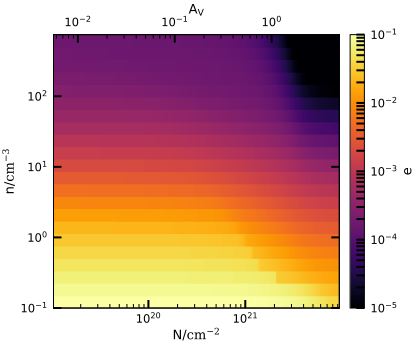

In [364]:
plot_chem.plot_abd(slab, "e", norm=LogNorm(), vmax=0.1, vmin=1e-5)

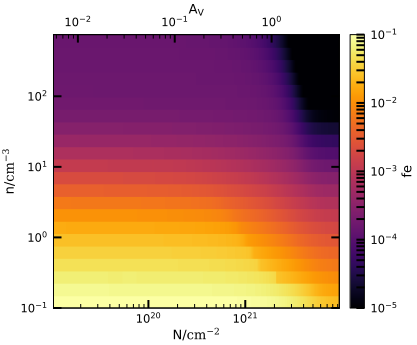

In [375]:
#fe = np.zeros(slab.nHM.shape)
#GPE = np.exp(-1.87*slab.NHM/1.87e21)
#GCI = np.exp(-3.76*slab.NHM/1.87e21)
#for i in xrange(slab.nHM.shape[0]):
#    for j in xrange(slab.nHM.shape[1]):
#        fe[i, j] = cu.fe(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j])
plot_chem.plot_abd(slab, "fe", plot_field=fe, norm=LogNorm(), vmax=0.1, vmin=1e-5)

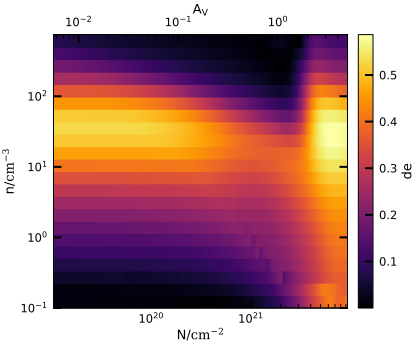

In [372]:
de = abs(fe - slab.abd["e"])/(slab.abd["e"]+1e-5)
plot_chem.plot_abd(slab, "de", plot_field=de)

In [377]:
fHplus_e = cu.fHplus_e(fe, slab.nHM, slab.abd["T"], GPE)
fCplus_e = cu.fCplus_e(fe, slab.nHM, slab.abd["T"], GPE, GCI)

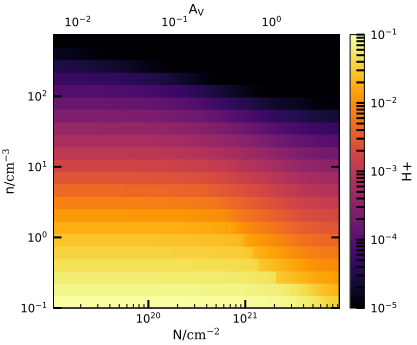

In [379]:
plot_chem.plot_abd(slab, "H+", norm=LogNorm(), vmax=0.1, vmin=1e-5)

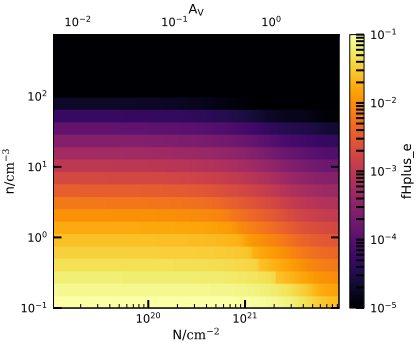

In [378]:
plot_chem.plot_abd(slab, "fHplus_e", plot_field=fHplus_e, norm=LogNorm(), vmax=0.1, vmin=1e-5)

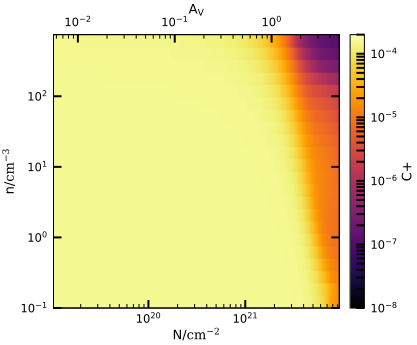

In [380]:
plot_chem.plot_abd(slab, "C+", norm=LogNorm(), vmax=2e-4, vmin=1e-7)

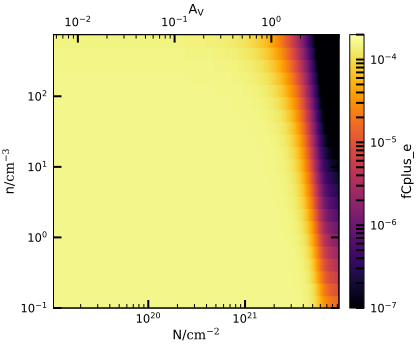

In [381]:
plot_chem.plot_abd(slab, "fCplus_e", plot_field=fCplus_e, norm=LogNorm(), vmax=2e-4, vmin=1e-7)

In [339]:
T = slab.abd["T"]
cgr_Hplus = np.array([12.25, 8.074e-6, 1.378, 5.087e2, 1.586e-2, 0.4723, 1.102e-5])
cgr_Cplus = np.array([45.58, 6.089e-3, 1.128, 4.331e2, 4.845e-2, 0.8120, 1.333e-4])
psi_gr = 1.7 * np.exp(-1.87*slab.NHM/1.87e21) * np.sqrt(T)/(slab.nHM * slab.abd["e"])
fgr_Hplus = 1./(1 + cgr_Hplus[1]*psi_gr**cgr_Hplus[2]*(
             1 + cgr_Hplus[3]*T**cgr_Hplus[4] * psi_gr**(-cgr_Hplus[5]-cgr_Hplus[6]*np.log(T))))
fgr_Cplus = 1./(1 + cgr_Cplus[1]*psi_gr**cgr_Cplus[2]*(
             1 + cgr_Cplus[3]*T**cgr_Cplus[4] * psi_gr**(-cgr_Cplus[5]-cgr_Cplus[6]*np.log(T))))

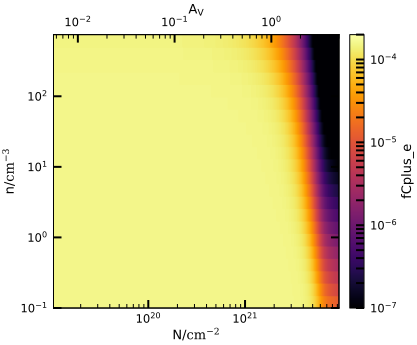

In [345]:
fCplus_e = cu.fCplus_e(slab.abd["e"], slab.nH, slab.abd["T"], 
                       np.exp(-1.87*slab.NHM/1.87e21), np.exp(-3.76*slab.NHM/1.87e21))
plot_chem.plot_abd(slab, "fCplus_e", plot_field=abs(fCplus_e), norm=LogNorm(), vmax=2e-4, vmin=1e-7)

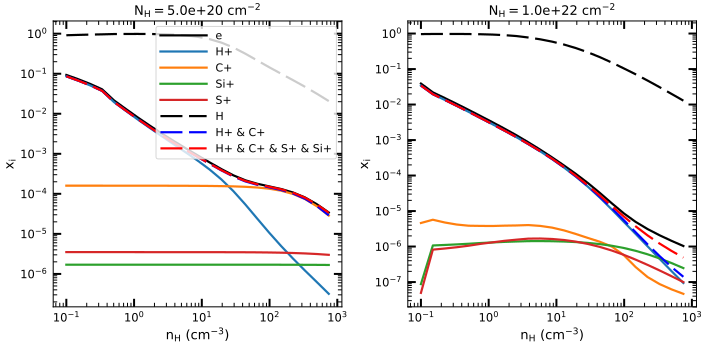

In [109]:
fig=plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for ax, NH_plot in zip([ax1, ax2], [5e20, 1e22]):
    ax.plot(slab.nH, slab.GetAbd("e", NH=NH_plot), "k-", label="e")
    ax.plot(slab.nH, slab.GetAbd("H+", NH=NH_plot), label="H+")
    ax.plot(slab.nH, slab.GetAbd("C+", NH=NH_plot), label="C+")
    ax.plot(slab.nH, slab.GetAbd("Si+", NH=NH_plot), label="Si+")
    ax.plot(slab.nH, slab.GetAbd("S+", NH=NH_plot), label="S+")
    ax.plot(slab.nH, slab.GetAbd("H", NH=NH_plot), "k--", label="H")
    ax.plot(slab.nH, slab.GetAbd("H+", NH=NH_plot) + slab.GetAbd("C+", NH=NH_plot), "b--", label="H+ & C+")
    ax.plot(slab.nH, slab.GetAbd("H+", NH=NH_plot) + slab.GetAbd("C+", NH=NH_plot) 
             + slab.GetAbd("Si+", NH=NH_plot) + slab.GetAbd("S+", NH=NH_plot), "r--", label="H+ & C+ & S+ & Si+")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("$n_H\ (cm^{-3})$")
    ax.set_ylabel("$x_i$")
    ax.set_title("$N_H=$"+"{:.1e}".format(NH_plot)+" $cm^{-2}$")
ax1.legend()

For $N_H \lesssim 5\times 10^{20}~\mathrm{cm^{-3}}$, electrons are provided by H+ at low density ($n_H \lesssim 20~\mathrm{cm^{-3}}$) and C+ at high density. At higher columns where the radiation field is sheilded by dust, S+ and Si+ provides some additional electrons. It's unclear whether this isimportant, because the electron abundance is already low at $x_e \lesssim 10^{-5}$ where S+ and Si+ becomes important.

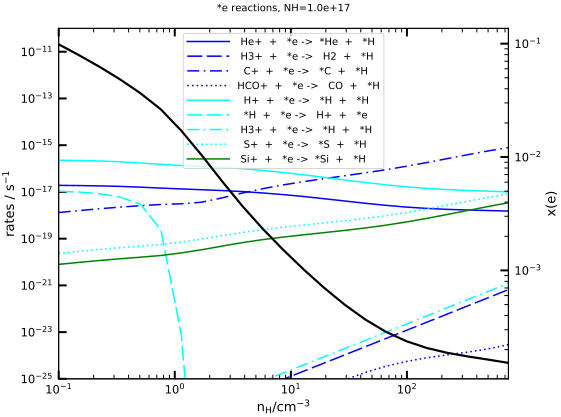

In [257]:
plot_chem.plot_rates_NH(slab, 1e17, "*e", abd_spec="e")

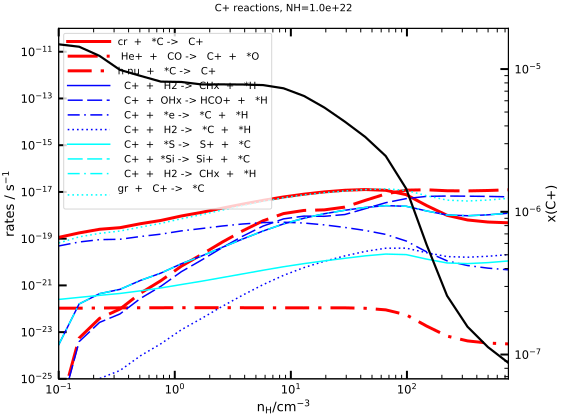

In [346]:
ax = plot_chem.plot_rates_NH(slab, 1e22, "C+")